Credit Card Fraud Detection Using Word Embeddings, Algorithm Category : Supervised Learning, Algorithm Name : Naive Bayes

1) Importing Necessary Libraries Numpy, Pandas, Sci-kit Learn, Matplotlib

In [44]:
# Importing Libraries

# Utitlity Libraries
import numpy as np
import pandas as pd

# Algorithm, Evaluation, and Model Libraries
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report,precision_score,recall_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import GaussianNB

# Visualisation Libraries
import matplotlib.pyplot as plt

from datetime import date

 Data Gathering from https://www.kaggle.com/datasets/kartik2112/fraud-detection
 Contains fraudTrain.csv,fraudTest.csv

2) Loading DataSet using Pandas
concatenate both dataset training dataset + testing dataset

In [45]:
df = pd.concat([pd.read_csv('C:/Users/PramelaRaaj/Downloads/archive/fraudTrain.csv'),
                pd.read_csv('C:/Users/PramelaRaaj/Downloads/archive/fraudTest.csv')], 
               ignore_index=True)

In [46]:
#printing dataset
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [47]:
# contains unwanted column so drop it off
df.drop('Unnamed: 0',axis = 1,inplace = True) 
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [48]:
#printing last 5 rows
df.tail()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
1852393,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,Edmond,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [49]:
#printing information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [50]:
#getting shape
df.shape

(1852394, 22)

In [51]:
#getting count of sum of null data
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

3) Data preprocessing

In [52]:
#getting age from dob(string) by converting string into int datatype
df['dob'] = pd.to_datetime(df['dob'])
df['age']=(pd.Timestamp('now') - df['dob'])/np.timedelta64(1, 'Y')
df['age'] = df['age'].astype(int)
df.drop(['dob'], axis = 1, inplace = True)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,35
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,45
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,61
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,56
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,37


In [53]:
df['lat_diff'] = abs(df.lat - df.merch_lat)
df['long_diff'] = abs(df.long - df.merch_long)

In [54]:
#getting distance by using lattitude difference and longitude difference
df['displacement'] = np.sqrt(pow((df['lat_diff']*110),2) + 
                             pow((df['long_diff']*110),2))

In [55]:
#distance categorized into Nearby,Far,Far Away
df.loc[(df['displacement'] < 45), ['location']] = "Near"
df.loc[((df['displacement'] >= 45) & (df['displacement'] <= 90)), 
       ['location']] = "Far"
df.loc[(df['displacement'] > 90), ['location']] = "Far Away"

In [56]:
df.location.value_counts(normalize = True)

Far Away    0.474664
Far         0.394203
Near        0.131133
Name: location, dtype: float64

In [57]:
df.loc[(df['city_pop'] < 10000), ['city_pop_segment']] = "Less Dense"
df.loc[((df['city_pop'] > 10000) & (df['city_pop'] < 50000)), 
       ["city_pop_segment"]] = "Moderately Dense"
df.loc[(df['city_pop'] > 50000), ['city_pop_segment']] = "More Dense"

In [58]:
df.city_pop_segment.value_counts(normalize = True)

Less Dense          0.700483
More Dense          0.186888
Moderately Dense    0.112629
Name: city_pop_segment, dtype: float64

In [59]:
df = df.drop("city_pop", axis = 1)

In [60]:
df['gender'] = df['gender'].replace(('M', 'F'), (0,1))

4) Feature Selection

In [61]:
df = df.drop(columns = ["lat", "long", "merch_lat", 
                        "merch_long", "lat_diff", 
                        "long_diff", "first", 
                        "last", "street", "city", 
                        "state", "trans_num", 
                        "trans_date_trans_time", 
                        "cc_num"])

In [62]:
#OrdinalEncoder - converts categorical feature into numerical feature
enc = OrdinalEncoder(dtype = np.float64)

In [63]:
enc.fit(df.loc[:, ['category', 'merchant', 
                   'job', 'location', 'city_pop_segment']])

OrdinalEncoder()

In [64]:
df.loc[:, ['category', 
           'merchant', 
           'job', 
           'location', 
           'city_pop_segment']] = enc.transform(df[['category', 
                                                    'merchant', 
                                                    'job', 
                                                    'location', 
                                                    'city_pop_segment']])

In [65]:
#getting types of data
df.dtypes

merchant            float64
category            float64
amt                 float64
gender                int64
zip                   int64
job                 float64
unix_time             int64
is_fraud              int64
age                   int32
displacement        float64
location            float64
city_pop_segment    float64
dtype: object

In [66]:
df

,merchant,category,amt,gender,zip,job,unix_time,is_fraud,age,displacement,location,city_pop_segment
0,514.0,8.0,4.97,1,28654,372.0,1325376018,0,35,96.011245,1.0,0.0
1,241.0,4.0,107.23,1,99160,431.0,1325376044,0,45,29.954105,2.0,0.0
2,390.0,0.0,220.11,0,83252,308.0,1325376051,0,61,107.342986,1.0,0.0
3,360.0,2.0,45.00,0,59632,330.0,1325376076,0,56,101.178169,1.0,0.0
4,297.0,9.0,41.96,0,24433,116.0,1325376186,0,37,95.535506,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,507.0,5.0,43.77,0,63453,477.0,1388534347,0,57,85.886059,0.0,0.0
1852390,264.0,7.0,111.84,0,77566,207.0,1388534349,0,23,106.869025,1.0,1.0
1852391,496.0,7.0,86.88,1,99323,307.0,1388534355,0,41,102.880793,1.0,0.0
1852392,75.0,13.0,7.99,0,83643,63.0,1388534364,0,57,71.535585,0.0,0.0


In [67]:
#printing count of fraud transaction
df.is_fraud.value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

In [68]:
x=df.drop(columns=['is_fraud'])
y=df['is_fraud']

5) Split the Dataset as Training Data (80%) and Testing Data (20%)

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [70]:
x_train

,merchant,category,amt,gender,zip,job,unix_time,age,displacement,location,city_pop_segment
445092,563.0,4.0,117.26,1,14037,92.0,1342486042,40,43.502793,2.0,0.0
432554,316.0,1.0,161.48,0,12992,176.0,1342148169,69,108.521537,1.0,0.0
1646605,494.0,4.0,125.30,1,38778,144.0,1383456205,36,121.173902,1.0,0.0
1714424,65.0,8.0,2.48,1,56117,139.0,1385884196,46,39.208574,2.0,0.0
34001,560.0,8.0,555.26,0,51453,6.0,1327121004,69,115.000799,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1391353,310.0,12.0,65.99,1,58531,281.0,1374661036,92,112.369204,1.0,0.0
1672309,605.0,2.0,76.96,0,32780,422.0,1384478837,36,28.797022,2.0,2.0
930938,64.0,4.0,177.27,1,48438,264.0,1357344089,38,79.944824,0.0,0.0
1235734,405.0,8.0,5.55,1,68881,358.0,1369962179,88,128.304093,1.0,0.0


In [71]:
x_test

,merchant,category,amt,gender,zip,job,unix_time,age,displacement,location,city_pop_segment
908125,286.0,13.0,2.59,1,70808,123.0,1356720826,46,93.040616,1.0,2.0
1687580,611.0,5.0,59.49,1,56548,410.0,1385061900,51,121.043134,1.0,0.0
1745200,359.0,4.0,27.40,0,73034,289.0,1386469682,30,96.572460,1.0,2.0
244912,32.0,12.0,71.31,1,78113,169.0,1336008552,56,60.819346,0.0,0.0
853149,89.0,6.0,25.47,1,33967,329.0,1355614942,37,109.987302,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
693692,169.0,7.0,20.22,1,44483,278.0,1350947064,66,108.197016,1.0,2.0
643603,37.0,13.0,9.57,1,72583,369.0,1349025198,37,51.927078,0.0,0.0
1706091,61.0,7.0,201.11,1,36617,442.0,1385763511,51,28.691086,2.0,2.0
515777,272.0,2.0,120.40,0,43760,45.0,1344678668,69,119.076647,1.0,0.0


In [72]:
y_train

445092     0
432554     0
1646605    0
1714424    0
34001      0
          ..
1391353    0
1672309    0
930938     0
1235734    0
1243573    0
Name: is_fraud, Length: 1481915, dtype: int64

In [73]:
y_test

908125     0
1687580    0
1745200    0
244912     0
853149     0
          ..
693692     0
643603     0
1706091    0
515777     0
220461     0
Name: is_fraud, Length: 370479, dtype: int64

6) Generating Model

In [74]:
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

7) Model Evaluation using Metrics(Accuracy , Precision , Recall , F1 score)

In [75]:
print("Accuracy using Naive Bayes model :{} %".format(accuracy_score(y_test, y_pred) * 100))
print("Precision using Naive Bayes model :{} %". format(precision_score(y_test, y_pred)* 100))
print("Recall using Naive Bayes model :{} %" . format(recall_score(y_test,y_pred)* 100))
print("F1 score using Naive Bayes model :{} %" . format(f1_score(y_test,y_pred)* 100))

Accuracy using Naive Bayes model :99.44882166060694 %
Precision using Naive Bayes model :0.0 %
Recall using Naive Bayes model :0.0 %
F1 score using Naive Bayes model :0.0 %



 [[368437    119]
 [  1923      0]]


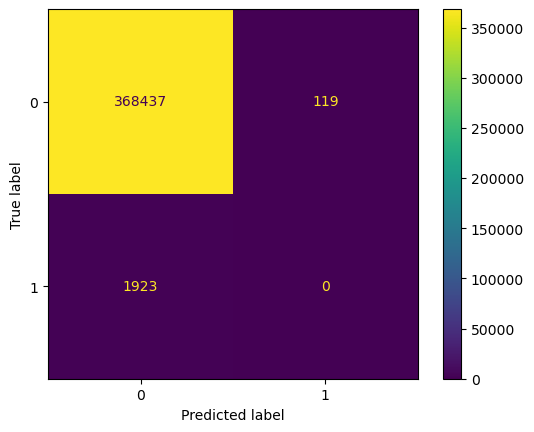

In [76]:
confusionmatrix = confusion_matrix(y_test, y_pred)
print("\n", confusionmatrix)
conf = ConfusionMatrixDisplay(confusion_matrix=confusionmatrix)
conf.plot()
plt.show()

In [77]:
cm = np.array(confusion_matrix(y_test,y_pred, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['Fraud', 'Not Fraud'],columns=['Predicted Fraud','Predicted Not Fraud'])
confusion

,Predicted Fraud,Predicted Not Fraud
Fraud,0,1923
Not Fraud,119,368437


In [78]:
print("Classification Report")
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368556
           1       0.00      0.00      0.00      1923

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479



8) Data Visualization using Bar Chart

<BarContainer object of 2 artists>

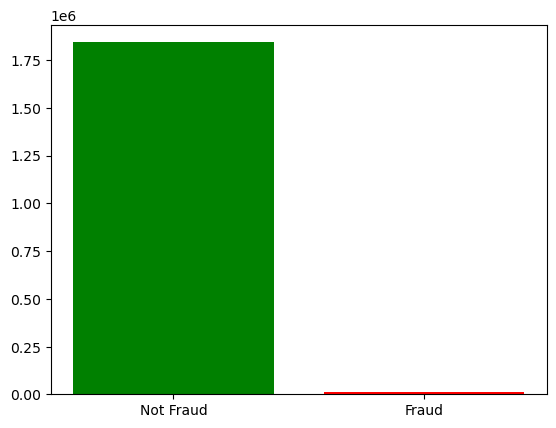

In [79]:
count_Class = pd.value_counts(df.is_fraud, sort = True)

# Data to Plot
labels = 'Not Fraud', 'Fraud'
sizes = [count_Class[0], count_Class[1]]
colors = ['Green', 'red']
explode = (0.1, 0.1)

# Plot
plt.bar(labels,sizes,color=colors)